In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
# Set dataset paths
base_dir = 'yesorno'
endoscopic_dir = os.path.join(base_dir, 'endoscopic')
non_endoscopic_dir = os.path.join(base_dir, 'non_endoscopic')

# Train and validation directories
train_dir = {
    'endoscopic': os.path.join(endoscopic_dir, 'train'),
    'non_endoscopic': os.path.join(non_endoscopic_dir, 'train')
}
validation_dir = {
    'endoscopic': os.path.join(endoscopic_dir, 'validation'),
    'non_endoscopic': os.path.join(non_endoscopic_dir, 'validation')
}

# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Augmentation for validation (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Combined Train Generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (endoscopic vs non_endoscopic)
)

# Combined Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification
)

Found 1440 images belonging to 2 classes.
Found 1440 images belonging to 2 classes.


In [11]:
# Build the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\kusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Save the Model
model.save('endoscopic_validator.h5')

In [ ]:
# Plot Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1440 images belonging to 2 classes.
Found 1440 images belonging to 2 classes.


c:\Users\kusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.7130 - loss: 0.8831

c:\Users\kusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 963ms/step - accuracy: 0.7158 - loss: 0.8738 - val_accuracy: 0.9083 - val_loss: 0.3359
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 863ms/step - accuracy: 0.9405 - loss: 0.1571 - val_accuracy: 0.9646 - val_loss: 0.0833
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 892ms/step - accuracy: 0.9815 - loss: 0.0609 - val_accuracy: 0.9847 - val_loss: 0.0413
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 893ms/step - accuracy: 0.9727 - loss: 0.0699 - val_accuracy: 0.9854 - val_loss: 0.0490
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 935ms/step - accuracy: 0.9791 - loss: 0.0452 - val_accuracy: 0.9931 - val_loss: 0.0159
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 945ms/step - accuracy: 0.9837 - loss: 0.0399 - val_accuracy: 0.9660 - val_loss: 0.0959
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 43s 964ms/step - accuracy: 0.9873 - loss: 0.0313 - val_accuracy: 0.9986 - val_loss: 0.0054
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 43s 959ms/step - accuracy: 0.9841 - loss: 0.0469 - val_accuracy: 0.995

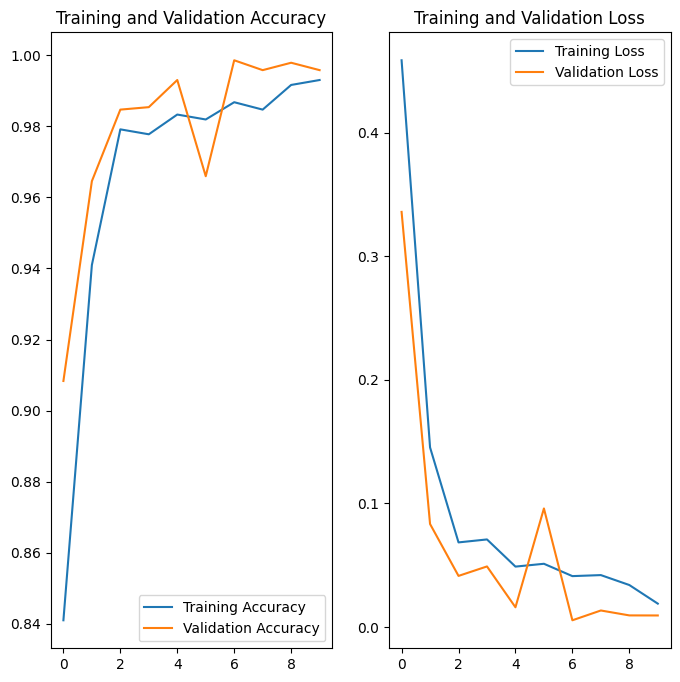

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set dataset paths
base_dir = 'yesorno'
endoscopic_dir = os.path.join(base_dir, 'endoscopic')
non_endoscopic_dir = os.path.join(base_dir, 'non_endoscopic')

# Train and validation directories
train_dir = {
    'endoscopic': os.path.join(endoscopic_dir, 'train'),
    'non_endoscopic': os.path.join(non_endoscopic_dir, 'train')
}
validation_dir = {
    'endoscopic': os.path.join(endoscopic_dir, 'validation'),
    'non_endoscopic': os.path.join(non_endoscopic_dir, 'validation')
}

# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Augmentation for validation (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Combined Train Generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (endoscopic vs non_endoscopic)
)

# Combined Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification
)

# Build the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Save the Model
model.save('endoscopic_validator.h5')

# Plot Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
